In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [8]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [9]:
data=pd.read_csv("Final_cleaned_data.csv")


In [10]:
data.duplicated().value_counts()

False    1303167
Name: count, dtype: int64

In [11]:
remove=['AMT_ANNUITY_x','AMT_GOODS_PRICE_x','NAME_INCOME_TYPE','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL','ORGANIZATION_TYPE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_APPLICATION','NAME_CONTRACT_STATUS','DAYS_EMPLOYED_YEARS','DAYS_REGISTRATION_YEARS','DAYS_ID_PUBLISH_YEARS','DAYS_LAST_PHONE_CHANGE_YEARS','DAYS_DECISION_YEARS']
data.drop(remove,axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303167 entries, 0 to 1303166
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1303167 non-null  int64  
 1   NAME_CONTRACT_TYPE_x         1303167 non-null  object 
 2   CODE_GENDER                  1303167 non-null  object 
 3   AMT_INCOME_TOTAL             1303167 non-null  float64
 4   AMT_CREDIT_x                 1303167 non-null  float64
 5   OCCUPATION_TYPE              1303167 non-null  object 
 6   OBS_30_CNT_SOCIAL_CIRCLE     1303167 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_YEAR   1303167 non-null  float64
 8   AMT_ANNUITY_y                1303167 non-null  float64
 9   AMT_CREDIT_y                 1303167 non-null  float64
 10  AMT_GOODS_PRICE_y            1303167 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1303167 non-null  object 
 12  NFLAG_INSURED_ON_APPROVAL    1303167 non-n

In [13]:
data.duplicated().value_counts()

False    1229506
True       73661
Name: count, dtype: int64

In [14]:
data.drop('AMT_ANNUITY_y',axis=1,inplace=True) 


In [15]:
data.drop('AMT_GOODS_PRICE_y',axis=1,inplace=True)

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().value_counts()

False    1214565
Name: count, dtype: int64

In [18]:
'''data.to_csv("final_data.csv", index=False)'''

'data.to_csv("final_data.csv", index=False)'

In [19]:
label_encoders = {}
for i in data.select_dtypes(include='object'):
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
    label_encoders[i] = le

<Axes: >

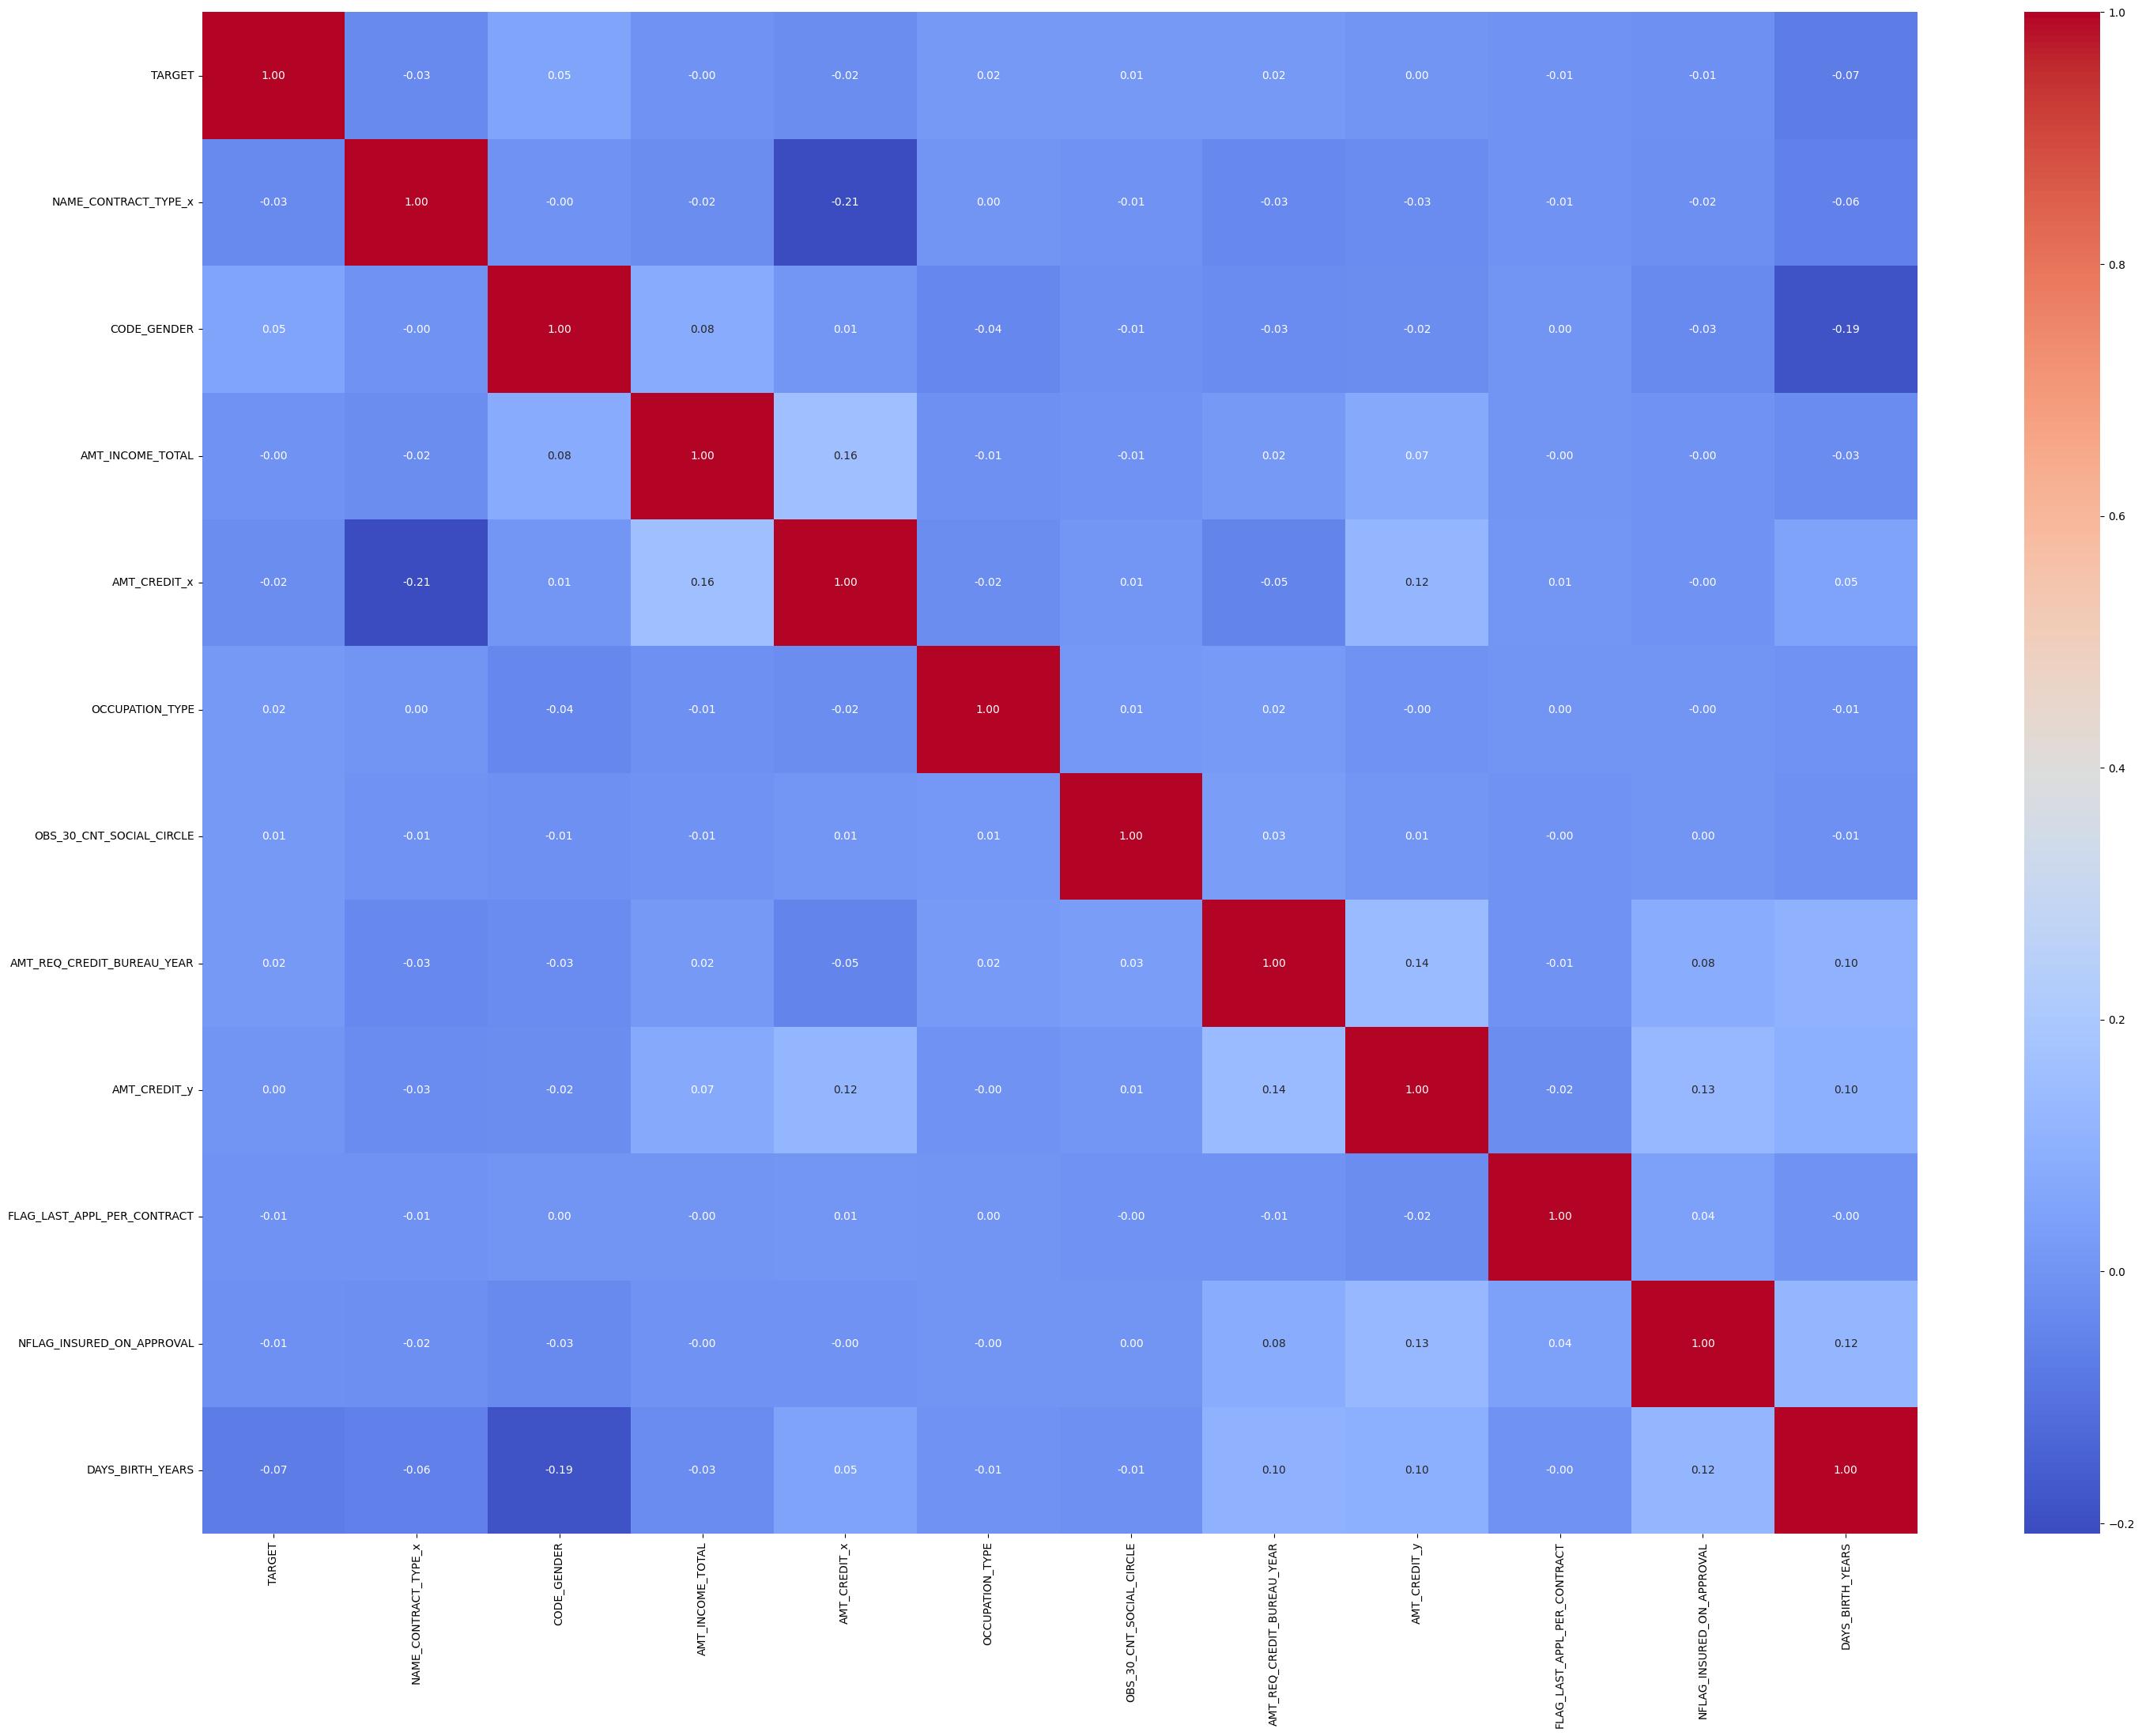

In [20]:
data_corr=data.corr()
plt.figure(figsize=(35,25))
sns.heatmap(data_corr, cmap="coolwarm",fmt=".2f",annot=True)

In [21]:
import pickle

In [22]:
'''with open("labelencoder.pkl", "wb") as file:
    pickle.dump(label_encoders, file)'''

'with open("labelencoder.pkl", "wb") as file:\n    pickle.dump(label_encoders, file)'

In [23]:
col=['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_CREDIT_y']

In [24]:
mm=MinMaxScaler()
data[col]=mm.fit_transform(data[col])

In [25]:
val=data.drop("TARGET",axis=1)
tar=data["TARGET"]

In [26]:
tar.value_counts()

TARGET
0    1112794
1     101771
Name: count, dtype: int64

In [27]:
os=SMOTE(random_state=76)
os_val,os_tar=os.fit_resample(val,tar)

In [28]:
train_data,test_data,train_lab,test_lab=train_test_split(os_val,os_tar,test_size=0.20,random_state=103)

In [29]:
def get_perform(actual, predict):
    acc_score = accuracy_score(actual, predict)
    prec_score = precision_score(actual, predict,average='macro')
    rec_score = recall_score(actual, predict,average='macro')
    f1 = f1_score(actual, predict, average='macro')
    return pd.DataFrame({
        "accuracy_score":[acc_score],
        "precision_score":[prec_score],
        "recall_score": [rec_score],
        "f1_score":[f1]
    })

In [30]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.4, max_depth=10, random_state=53)
xgb.fit(train_data, train_lab)
xgb_train_pred = xgb.predict(train_data)
xgb_test_pred = xgb.predict(test_data)

In [82]:
metrics_train=get_perform(train_lab, xgb_train_pred)


In [94]:
metrics_test=get_perform(test_lab, xgb_test_pred )


In [95]:
metrics_test


,accuracy_score,precision_score,recall_score,f1_score
0,0.914054,0.914076,0.914052,0.914053


In [105]:
#import pickle
with open("xgbfinal.pkl", "wb") as file:
    pickle.dump(xgb, file)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214565 entries, 0 to 1303166
Data columns (total 12 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1214565 non-null  int64  
 1   NAME_CONTRACT_TYPE_x         1214565 non-null  int64  
 2   CODE_GENDER                  1214565 non-null  int64  
 3   AMT_INCOME_TOTAL             1214565 non-null  float64
 4   AMT_CREDIT_x                 1214565 non-null  float64
 5   OCCUPATION_TYPE              1214565 non-null  int64  
 6   OBS_30_CNT_SOCIAL_CIRCLE     1214565 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_YEAR   1214565 non-null  float64
 8   AMT_CREDIT_y                 1214565 non-null  float64
 9   FLAG_LAST_APPL_PER_CONTRACT  1214565 non-null  int64  
 10  NFLAG_INSURED_ON_APPROVAL    1214565 non-null  float64
 11  DAYS_BIRTH_YEARS             1214565 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 120.5 MB


In [115]:
combined_df.to_csv("score.csv",index=False)

In [39]:
log=LogisticRegression()
log = LogisticRegression(random_state=42, max_iter=1000)
log.fit(train_data, train_lab)
log_train_pred = log.predict(train_data)
log_test_pred = log.predict(test_data)


In [75]:
log_metrics_train=get_perform(train_lab, log_train_pred)


In [76]:
log_metrics_test=get_perform(test_lab, log_test_pred )


In [77]:
log_metrics_test

,accuracy_score,precision_score,recall_score,f1_score
0,0.58323,0.583328,0.583242,0.583127


In [42]:
from sklearn.ensemble import GradientBoostingClassifier


In [104]:
gbc=GradientBoostingClassifier()
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=60)
gbc.fit(train_data, train_lab)
gbc_train_pred = gbc.predict(train_data)
gbc_test_pred = gbc.predict(test_data)


In [107]:
gbc_metrics_train=get_perform(train_lab, gbc_train_pred)


In [108]:
gbc_metrics_test=get_perform(test_lab, gbc_test_pred )


In [109]:
gbc_metrics_test

,accuracy_score,precision_score,recall_score,f1_score
0,0.718513,0.718625,0.718504,0.718472


In [110]:
df = pd.DataFrame({
    "Algorithm": ["XGBC"],
    "accuracy": [metrics_test["accuracy_score"].values[0]],
    "precision": [metrics_test["precision_score"].values[0]],
    "recall": [metrics_test["recall_score"].values[0]],
    "f1_score": [metrics_test["f1_score"].values[0]]
})


In [111]:
df1 = pd.DataFrame({
    "Algorithm": ["log"],
    "accuracy": [log_metrics_test["accuracy_score"].values[0]],
    "precision": [log_metrics_test["precision_score"].values[0]],
    "recall": [log_metrics_test["recall_score"].values[0]],
    "f1_score": [log_metrics_test["f1_score"].values[0]]
})

In [112]:
df2 = pd.DataFrame({
    "Algorithm": ["gbc"],
    "accuracy": [gbc_metrics_test["accuracy_score"].values[0]],
    "precision": [gbc_metrics_test["precision_score"].values[0]],
    "recall": [gbc_metrics_test["recall_score"].values[0]],
    "f1_score": [gbc_metrics_test["f1_score"].values[0]]
})

In [113]:
combined_df = pd.concat([df1, df2, df], ignore_index=True)


In [114]:
combined_df

,Algorithm,accuracy,precision,recall,f1_score
0,log,0.583230,0.583328,0.583242,0.583127
1,gbc,0.718513,0.718625,0.718504,0.718472
2,XGBC,0.914054,0.914076,0.914052,0.914053


In [121]:
sample_row  = data.loc[[1303042]].drop('TARGET', axis=1)


1303042

In [122]:
predicted_scaled = xgb.predict(sample_row)


In [123]:
predicted_scaled

array([0])